In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("accidental-deaths-in-usa-monthly.csv")
df.head()

,Month,"Accidental deaths in USA: monthly, 1973 ? 1978"
0,1973-01,9007
1,1973-02,8106
2,1973-03,8928
3,1973-04,9137
4,1973-05,10017


In [3]:
df.tail()

,Month,"Accidental deaths in USA: monthly, 1973 ? 1978"
67,1978-08,9827
68,1978-09,9110
69,1978-10,9070
70,1978-11,8633
71,1978-12,9240


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 2 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   Month                                           72 non-null     object
 1   Accidental deaths in USA: monthly, 1973 ? 1978  72 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.2+ KB


In [5]:
df["Month"] = pd.to_datetime(df["Month"])

In [6]:
df.drop('Month', axis=1, inplace=True)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 1 columns):
 #   Column                                          Non-Null Count  Dtype
---  ------                                          --------------  -----
 0   Accidental deaths in USA: monthly, 1973 ? 1978  72 non-null     int64
dtypes: int64(1)
memory usage: 704.0 bytes


In [8]:
df.shape

(72, 1)

<Axes: >

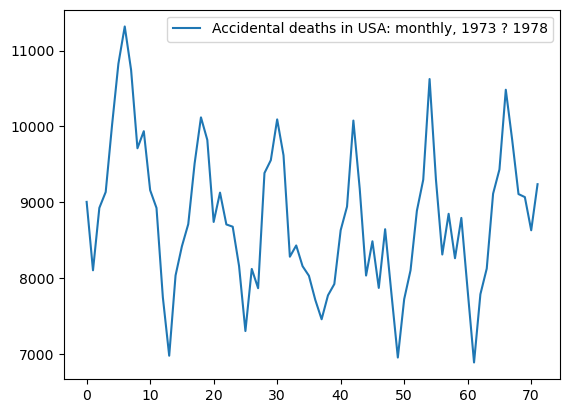

In [9]:
df.plot()

In [10]:
from sklearn.metrics import mean_squared_error

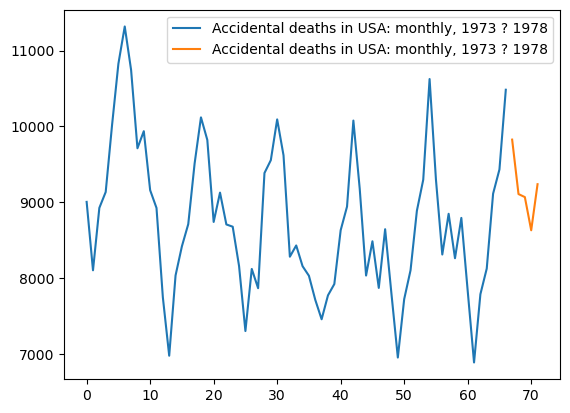

In [11]:
from matplotlib import pyplot
train, test = df[:67], df[67:]
n = len(df)
n_train = len(train)
n_test = len(test)

#plot
fig, ax = pyplot.subplots()
train.plot(ax=ax);
test.plot(ax=ax);

In [12]:
train.tail()

,"Accidental deaths in USA: monthly, 1973 ? 1978"
62,7791
63,8129
64,9115
65,9434
66,10484


In [13]:
test.head()

,"Accidental deaths in USA: monthly, 1973 ? 1978"
67,9827
68,9110
69,9070
70,8633
71,9240


<Axes: >

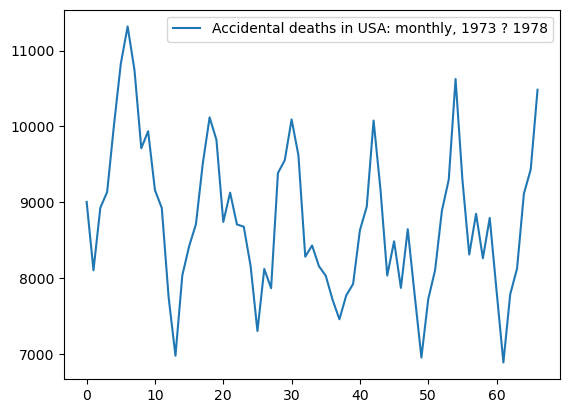

In [14]:
train.plot()

<Axes: >

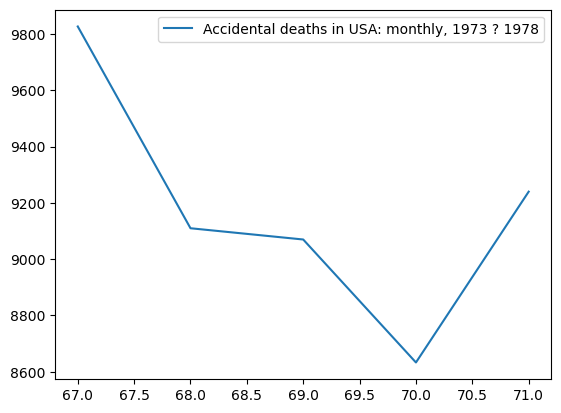

In [15]:
test.plot()

In [16]:
import pmdarima as pm

def arimamodel(timeseries):
    automodel = pm.auto_arima(timeseries,
                              start_p = 2,
                              start_q = 0,
                              test = "adf",
                              seasonal = True,
                              trace = True,
                              stepwise = False)
    return automodel

In [17]:
automodel = arimamodel(train)
print(automodel.summary())

 ARIMA(0,0,0)(0,0,0)[1] intercept   : AIC=1116.350, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[1] intercept   : AIC=1082.009, Time=0.10 sec
 ARIMA(0,0,2)(0,0,0)[1] intercept   : AIC=1074.371, Time=0.18 sec
 ARIMA(0,0,3)(0,0,0)[1] intercept   : AIC=1068.569, Time=0.20 sec
 ARIMA(0,0,4)(0,0,0)[1] intercept   : AIC=1066.628, Time=0.47 sec
 ARIMA(0,0,5)(0,0,0)[1] intercept   : AIC=1068.411, Time=0.50 sec
 ARIMA(1,0,0)(0,0,0)[1] intercept   : AIC=1072.562, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[1] intercept   : AIC=1073.107, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[1] intercept   : AIC=1071.921, Time=0.10 sec
 ARIMA(1,0,3)(0,0,0)[1] intercept   : AIC=1071.167, Time=0.28 sec
 ARIMA(1,0,4)(0,0,0)[1] intercept   : AIC=1070.858, Time=0.20 sec
 ARIMA(2,0,0)(0,0,0)[1] intercept   : AIC=1071.875, Time=0.11 sec
 ARIMA(2,0,1)(0,0,0)[1] intercept   : AIC=1074.769, Time=0.19 sec
 ARIMA(2,0,2)(0,0,0)[1] intercept   : AIC=1071.931, Time=0.20 sec
 ARIMA(2,0,3)(0,0,0)[1] intercept   : AIC=1071.450, Time=0.32 sec
 ARIMA(3,0

In [18]:
predictions_arima = automodel.predict(n_periods=test.shape[0])
predictions_arima

67    10130.804392
68     9237.360024
69     8870.832434
70     8179.472584
71     8592.062668
dtype: float64

# Visualisasi

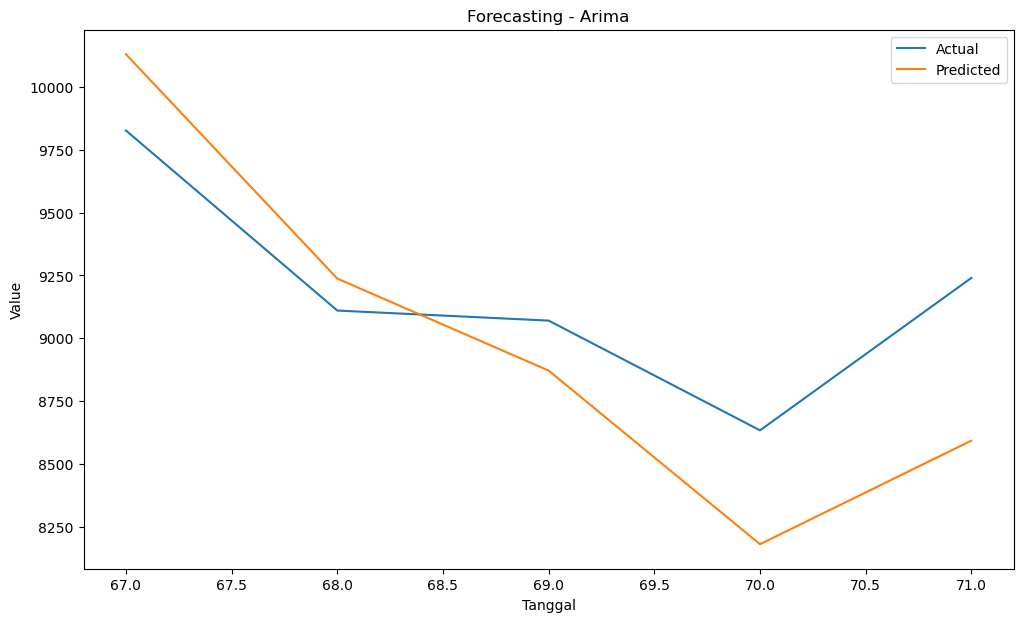

In [19]:
pyplot.figure(figsize=(12,7));
pyplot.plot(test.index, test, label='Actual');
pyplot.plot(test.index, predictions_arima, label='Predicted');
pyplot.title('Forecasting - Arima')
pyplot.xlabel('Tanggal')
pyplot.ylabel('Value')
pyplot.legend();

In [20]:
from math import sqrt
rmse = sqrt(mean_squared_error(test,predictions_arima))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 393.369


# Improvement - More Training data

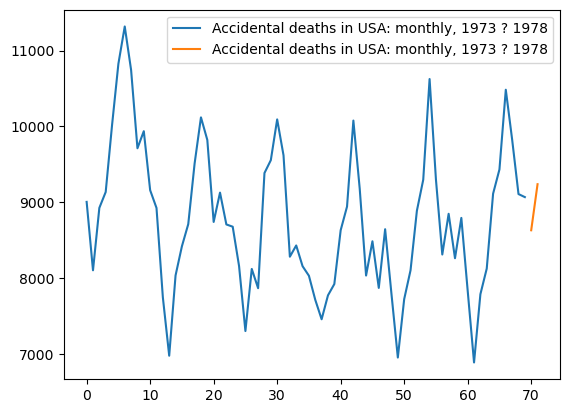

In [21]:
train, test = df[:70], df[70:]
n = len(df)
n_train = len(train)
n_test = len(test)

#plot
fig, ax = pyplot.subplots()
train.plot(ax=ax);
test.plot(ax=ax);

In [22]:
automodel = arimamodel(train)
print(automodel.summary())

 ARIMA(0,0,0)(0,0,0)[1] intercept   : AIC=1164.525, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[1] intercept   : AIC=1127.643, Time=0.08 sec
 ARIMA(0,0,2)(0,0,0)[1] intercept   : AIC=1119.592, Time=0.11 sec
 ARIMA(0,0,3)(0,0,0)[1] intercept   : AIC=1112.775, Time=0.24 sec
 ARIMA(0,0,4)(0,0,0)[1] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(0,0,5)(0,0,0)[1] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(1,0,0)(0,0,0)[1] intercept   : AIC=1117.675, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[1] intercept   : AIC=1118.090, Time=0.05 sec
 ARIMA(1,0,2)(0,0,0)[1] intercept   : AIC=1117.294, Time=0.08 sec
 ARIMA(1,0,3)(0,0,0)[1] intercept   : AIC=1115.984, Time=0.23 sec
 ARIMA(1,0,4)(0,0,0)[1] intercept   : AIC=1115.924, Time=0.33 sec
 ARIMA(2,0,0)(0,0,0)[1] intercept   : AIC=1116.813, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[1] intercept   : AIC=1119.693, Time=0.25 sec
 ARIMA(2,0,2)(0,0,0)[1] intercept   : AIC=1116.954, Time=0.15 sec
 ARIMA(2,0,3)(0,0,0)[1] intercept   : AIC=1114.908, Time=0.35 sec
 ARIMA(3,0,0)(0,0,0)

In [23]:
predictions_arima = automodel.predict(n_periods=test.shape[0])
predictions_arima

70    8530.013282
71    8757.160729
dtype: float64

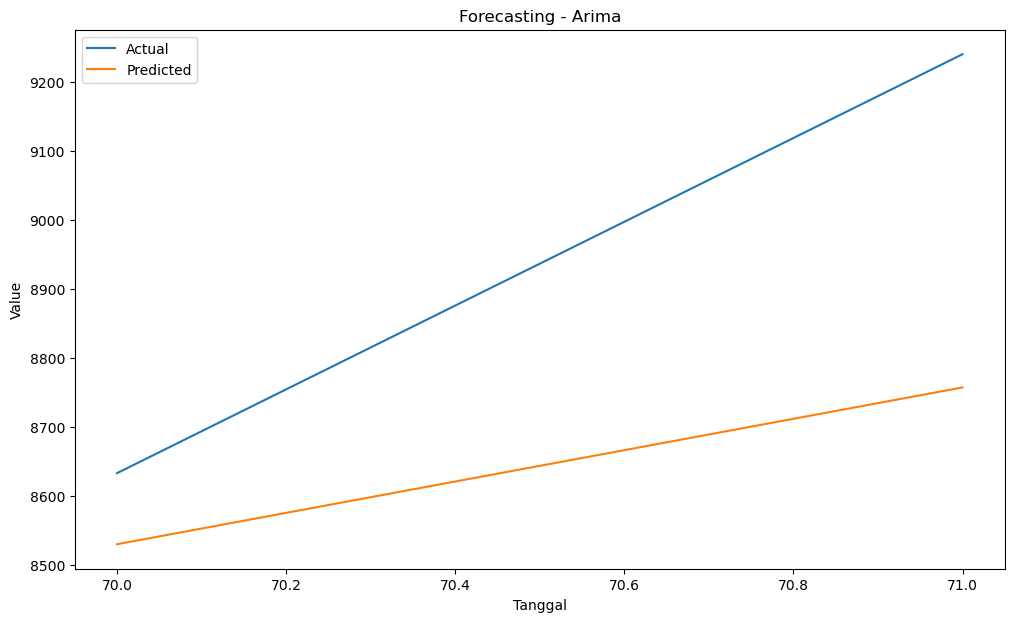

In [24]:
pyplot.figure(figsize=(12,7));
pyplot.plot(test.index, test, label='Actual');
pyplot.plot(test.index, predictions_arima, label='Predicted');
pyplot.title('Forecasting - Arima')
pyplot.xlabel('Tanggal')
pyplot.ylabel('Value')
pyplot.legend();

In [25]:
from math import sqrt
rmse = sqrt(mean_squared_error(test,predictions_arima))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 349.099


In [26]:
import itertools

def grid_search_arima(train, p_values, d_values, q_values):
    best_aic = float("inf")
    best_order = None
    best_seasonal_order = None

    for p, d, q in itertools.product(p_values, d_values, q_values):
        try:
            model = pm.ARIMA(order=(p, d, q))
            results = model.fit(train)
            aic = results.aic

            if aic < best_aic:
                best_aic = aic
                best_order = (p, d, q)
                best_seasonal_order = (0, 0, 0, 0)  # Non-seasonal ARIMA

        except:
            continue

    return best_order, best_seasonal_order

In [27]:
# Parameter values to try
p_values = range(0, 3)
d_values = range(0, 2)
q_values = range(0, 3)

best_order, best_seasonal_order = grid_search_arima(train, p_values, d_values, q_values)

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [28]:
# Training with optimized parameters
model = pm.ARIMA(order=best_order)
results = model.fit(train)
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   70
Model:                        SARIMAX   Log Likelihood                -580.263
Date:                Sun, 18 Jun 2023   AIC                           1164.525
Time:                        15:56:49   BIC                           1169.022
Sample:                             0   HQIC                          1166.312
                                 - 70                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   8783.4857    119.544     73.475      0.000    8549.183    9017.789
sigma2      9.282e+05   1.75e+05      5.309      0.000    5.86e+05    1.27e+06
Ljung-Box (L1) (Q):                  36.99   Jarque-

In [29]:
# Testing
predictions = results.predict(n_periods=test.shape[0])

In [30]:
# Mengambil nilai aktual
actual = test.values

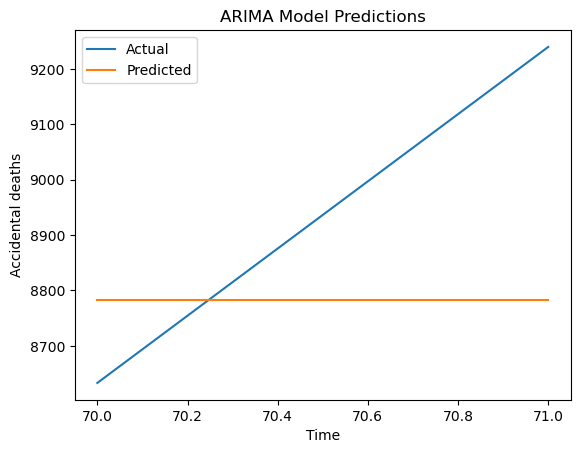

In [34]:
# Mengambil indeks data test
index = test.index

# Membuat DataFrame untuk hasil prediksi dan nilai aktual
df_predictions = pd.DataFrame(predictions, index=index, columns=['Predictions'])
df_actual = pd.DataFrame(actual, index=index, columns=['Actual'])

# Menggabungkan DataFrame prediksi dan nilai aktual
df_eval = pd.concat([df_actual, df_predictions], axis=1)

import matplotlib.pyplot as plt

# Plotting the actual and predicted values
plt.plot(df_eval.index, df_eval['Actual'].values, label='Actual')
plt.plot(df_eval.index, df_eval['Predictions'].values, label='Predicted')

# Set labels and title
plt.xlabel('Time')
plt.ylabel('Accidental deaths')
plt.title('ARIMA Model Predictions')

# Add a legend
plt.legend()

# Display the plot
plt.show()

In [35]:
# Menghitung RMSE
rmse = mean_squared_error(actual, predictions, squared=False)

print("Test RMSE:", rmse)

Test RMSE: 339.8906024482775


In [36]:
import pmdarima as pm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Pemilihan Fitur dan Penanganan Outliers
# Contoh: Menggunakan fitur tambahan 'feature1' dan 'feature2'
train = df[:70]
test = df[70:]

In [37]:
# Model ARIMA dengan fitur tambahan
model = pm.auto_arima(train['Accidental deaths in USA: monthly, 1973 ? 1978'],
                      seasonal=True,
                      m=12)

In [38]:
# Pemilihan Order Model dengan AIC
best_order = model.order
best_seasonal_order = model.seasonal_order

In [39]:
# Training dengan optimized parameters
model = ARIMA(train['Accidental deaths in USA: monthly, 1973 ? 1978'],
              order=best_order,
              seasonal_order=best_seasonal_order)
results = model.fit()

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<function matplotlib.pyplot.show(close=None, block=None)>

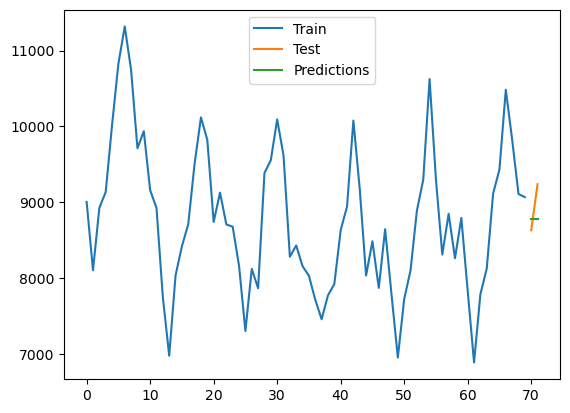

In [40]:
# Visualisasi
fig, ax = plt.subplots()
train['Accidental deaths in USA: monthly, 1973 ? 1978'].plot(ax=ax)
test['Accidental deaths in USA: monthly, 1973 ? 1978'].plot(ax=ax)
predictions.plot(ax=ax)
plt.legend(["Train", "Test", "Predictions"])
plt.show

In [41]:
# Evaluasi RMSE
predictions = results.predict(start=test.index[0], end=test.index[-1])
mse = mean_squared_error(test['Accidental deaths in USA: monthly, 1973 ? 1978'], predictions)
rmse = np.sqrt(mse)
print("Test RMSE:", rmse)

Test RMSE: 302.26641281522177


# attemp 3 with Sarimax

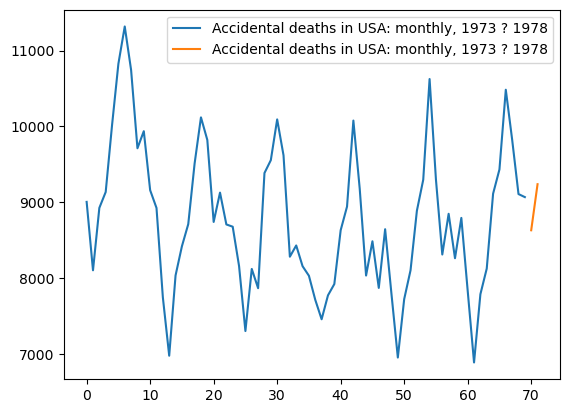

In [42]:
train, test = df[:70], df[70:]
n = len(df)
n_train = len(train)
n_test = len(test)

#plot
fig, ax = pyplot.subplots()
train.plot(ax=ax);
test.plot(ax=ax);

In [43]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(df["Accidental deaths in USA: monthly, 1973 ? 1978"], trace=True,
                         supress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1147.419, Time=0.33 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1195.909, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1148.364, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1158.169, Time=0.17 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1514.847, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1147.648, Time=0.15 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1150.543, Time=0.39 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=1148.171, Time=0.42 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=1144.339, Time=0.58 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=1146.145, Time=0.42 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=1149.115, Time=0.56 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=1144.196, Time=0.47 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.75 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.75 sec
 ARIMA(2,0,5)(0,0,0)[0] intercept   : AIC=1

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   72
Model:               SARIMAX(0, 0, 4)   Log Likelihood                -564.398
Date:                Sun, 18 Jun 2023   AIC                           1140.796
Time:                        16:53:46   BIC                           1154.456
Sample:                             0   HQIC                          1146.234
                                 - 72                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   8601.7689    303.064     28.383      0.000    8007.774    9195.764
ma.L1          0.9755      0.138      7.060      0.000       0.705       1.246
ma.L2          0.8151      0.193      4.226      0.000       0.437       1.193
ma.L3          0.2859      0.174      1.642      0.101      -0.055       0.627
ma.L4         -0.3797      0.150     -2.532      0.011      -0.674      -0.086
sigma2      3.888e+05   1.11e+05      3.508      0.000    1.72e+05    6.06e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 6.82
Prob(Q):                              0.84   Prob(JB):                         0.03
Heteroskedasticity (H):               0.80   Skew:                             0.74
Prob(H) (two-sided):                  0.60   Kurtosis:                         2.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [44]:
from statsmodels.tsa.arima_model import ARIMA

In [45]:
print(df.shape)
train = df.iloc[:70]
test = df.iloc[70:]
print(train.shape, test.shape)

(72, 1)
(70, 1) (2, 1)


In [46]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model_fit = SARIMAX(train['Accidental deaths in USA: monthly, 1973 ? 1978'], order=(0, 0, 4)).fit()

start = len(train)
end = len(train) + len(test) - 1

# Make predictions
pred = model_fit.predict(start=start, end=end, typ='levels')
print(pred)

70    7034.123401
71    5768.343070
Name: predicted_mean, dtype: float64


In [47]:
start = len(train)
end = len(train) + len(test) - 1

# Retrieve the estimated model parameters
params = model_fit.params
# Make predictions
pred = model_fit.predict(start=start, end=end, typ='levels', params=params)
print(pred)

70    7034.123401
71    5768.343070
Name: predicted_mean, dtype: float64


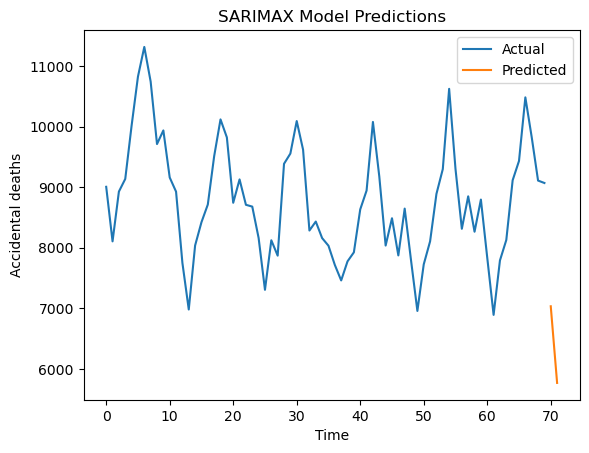

In [48]:
import matplotlib.pyplot as plt

# Generate the range of x-axis values for plotting
x_values = range(len(train) + len(test))

# Plot the actual data
plt.plot(x_values[:len(train)], train, label='Actual')

# Plot the predicted values
plt.plot(x_values[len(train):], pred, label='Predicted')

# Set labels and title
plt.xlabel('Time')
plt.ylabel('Accidental deaths')
plt.title('SARIMAX Model Predictions')

# Add a legend
plt.legend()

# Display the plot
plt.show()


In [49]:
# Assuming i have the actual test data available
actual = test['Accidental deaths in USA: monthly, 1973 ? 1978']

# Calculate the RMSE
rmse = np.sqrt(mean_squared_error(actual, pred))

print(f"RMSE: {rmse}")

RMSE: 2702.66611168698
